**Mohamed Yassine Kabouri**

Check:

*All of Statistics: A Concise Course in Statistical Inference* by Larry A. Wasserman


In [45]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

# Maximum Likelihood Estimation (MLE)

**Reminder:**

- The likelihood function is defined as follows:
$$
\mathcal{L}_n(\theta) = \prod_{i=1}^n f(X_i; \theta)
$$
Where $X_1, ..., X_n$ are iid with pdf $f(x; \theta)$.

- The maximum likelihood estimator (**MLE**), denoted by $\hat{\theta}_n$, is used to estimate parameters of a parametric model and is defined as follows:
$$
\hat{\theta}_n = \arg\max_\theta \mathcal{L}_n(\theta)
$$


* Estimated Mean (MLE): 1.8558981231224534
* Estimated Standard Deviation (MLE): 3.9296915259532192
* Other minimize outputs:
True
CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH


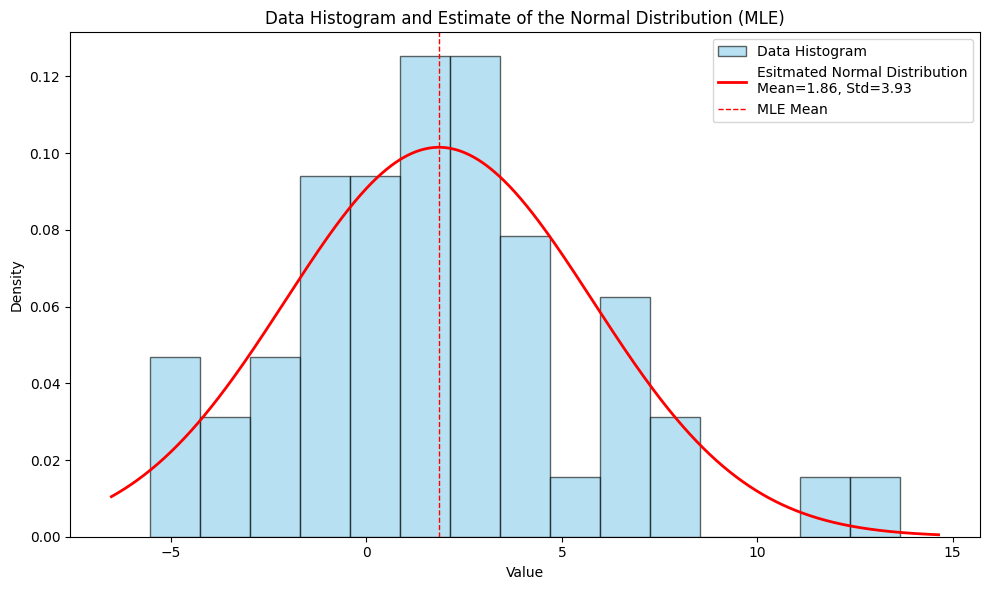

In [61]:
# Intuition with code
num_samples = 50
true_mean = 2
true_std = 4
data_points = np.random.normal(true_mean, true_std, size=num_samples)

# Note: we use negative log likelihood to use minimize of scipy
def neg_log_likelihood(parameters, data_points):
    mu, sigma = parameters
    return -np.sum(norm.logpdf(data_points, mu, sigma))

initial_guess = (0, 1)
bounds = [(None, None), (1e-6, None)]
optimization_output = minimize(neg_log_likelihood, initial_guess, args=(data_points,), bounds=bounds)
mle_mean, mle_std = optimization_output.x

print(f"* Estimated Mean (MLE):", mle_mean)
print(f"* Estimated Standard Deviation (MLE):", mle_std)
print(f"* Other minimize outputs:")
print(f"{optimization_output.success}")
print(f"{optimization_output.message}")

x_values = np.linspace(min(data_points)-1, max(data_points)+1, 1000)
pdf_values = norm.pdf(x_values, mle_mean, mle_std)

plt.figure(figsize=(10, 6))
plt.hist(data_points, bins=15, density=True, alpha=0.6, color='skyblue', edgecolor='black', label="Data Histogram")
plt.plot(x_values, pdf_values, 'r-', label=f'Esitmated Normal Distribution\nMean={mle_mean:.2f}, Std={mle_std:.2f}', linewidth=2)
plt.axvline(mle_mean, color='red', linestyle='--', linewidth=1, label="MLE Mean")
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Data Histogram and Estimate of the Normal Distribution (MLE)")
plt.legend()
plt.tight_layout()

# Maximum A Posteriori estimation (MAP)

Check:

https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation

**Reminder:**

Now suppose that we have prior knowledge about our parameter $\theta$. We denote this prior distribution over $\theta$ by $g(\theta)$. So, $\theta$ is treated as a random variable, and Bayes rule gives us:

$$
f(\theta \mid X) = \frac{f(X \mid \theta) \, g(\theta)}{\int_{\Theta} f(X \mid \theta) \, g(\theta) \, d\theta}
$$

where:

- $f(X \mid \theta)$ is the likelihood of the data given $\theta$,
- $g(\theta)$ is the prior distribution over $\theta$, and
- $\int_{\Theta} f(X \mid \theta) \, g(\theta) \, d\theta$ is the normalization factor.

The maximum a posteriori (MAP) estimate of $\theta$ is:

$$
\hat{\theta}_{MAP}(X) = \arg\max_\theta f(\theta \mid X) = \arg\max_\theta \left( f(X \mid \theta) \times g(\theta) \right)
$$

**Note:** Observe that the MAP estimate of $\theta$ coincides with the maximum likelihood (ML) estimate when the prior $g(\theta)$ is uniform.

MAP Estimate for mean: 1.7684813437465134
MAP Estimate for std deviation: 4.027853927416316
* Other minimize outputs:
True
CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH


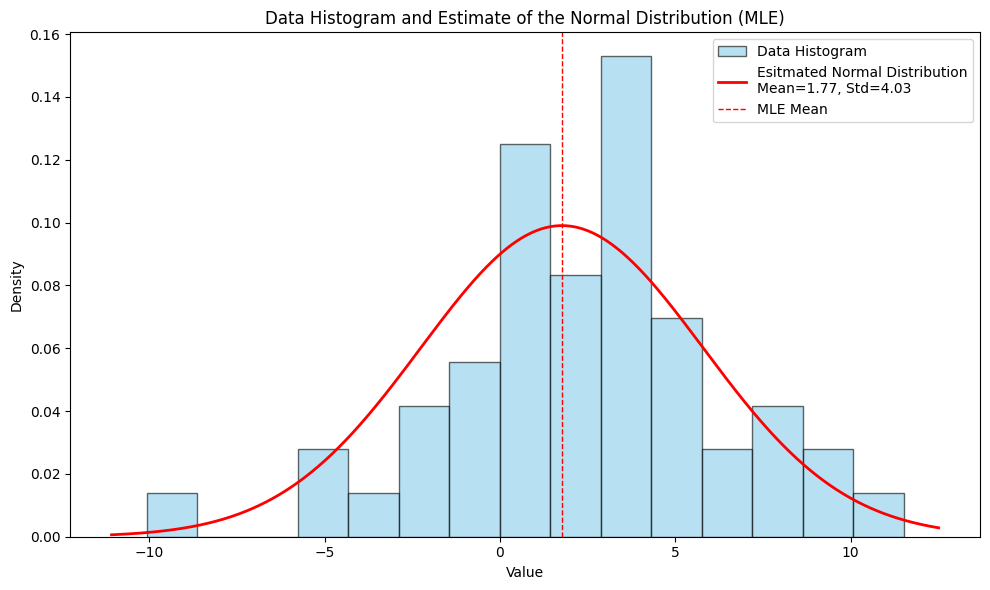

In [63]:
num_samples = 50
true_mean = 2
true_std = 4
data_points = np.random.normal(true_mean, true_std, size=num_samples)

prior_mean = 0
prior_std = 1

def neg_log_posterior(parameters, data_points):
    mu, sigma = parameters
    neg_log_likelihood = -np.sum(norm.logpdf(data_points, mu, sigma))
    neg_log_prior = -norm.logpdf(mu, prior_mean, prior_std)
    return neg_log_likelihood + neg_log_prior

initial_guess = [0, 1]
optimization_output = minimize(neg_log_posterior, initial_guess, args=(data_points), bounds=[(None, None), (1e-6, None)])

map_mean, map_sigma = optimization_output.x
print("MAP Estimate for mean:", map_mean)
print("MAP Estimate for std deviation:", map_sigma)
print(f"* Other minimize outputs:")
print(f"{optimization_output.success}")
print(f"{optimization_output.message}")

x_values = np.linspace(min(data_points)-1, max(data_points)+1, 1000)
pdf_values = norm.pdf(x_values, map_mean, map_sigma)

plt.figure(figsize=(10, 6))
plt.hist(data_points, bins=15, density=True, alpha=0.6, color='skyblue', edgecolor='black', label="Data Histogram")
plt.plot(x_values, pdf_values, 'r-', label=f'Esitmated Normal Distribution\nMean={map_mean:.2f}, Std={map_sigma:.2f}', linewidth=2)
plt.axvline(map_mean, color='red', linestyle='--', linewidth=1, label="MLE Mean")
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Data Histogram and Estimate of the Normal Distribution (MLE)")
plt.legend()
plt.tight_layout()

# Combine both in one plot with varying number of samples

# Expectation-Maximization algorithm (EM)